Import Required Libraries

In [17]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report

Loading Data

In [18]:
df=pd.read_csv('vgsales.csv')
print(df.head())
print(df.info())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------  

Exploratory Data Analysis

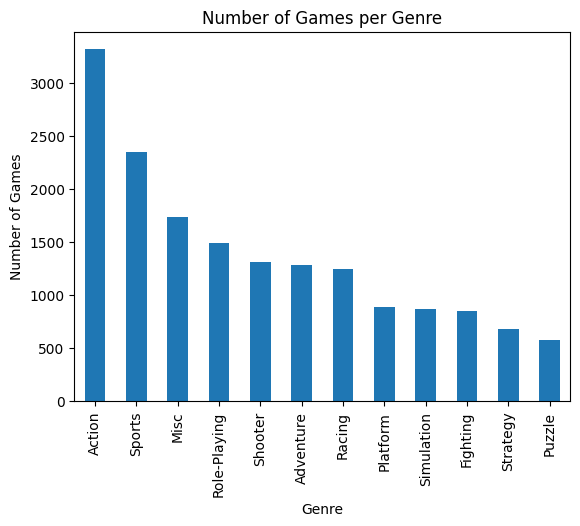

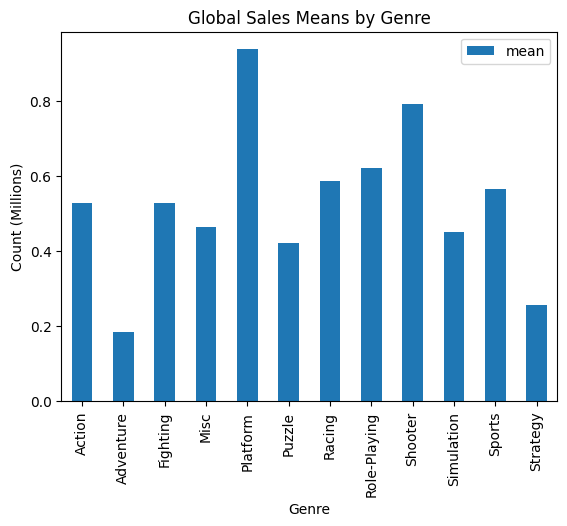

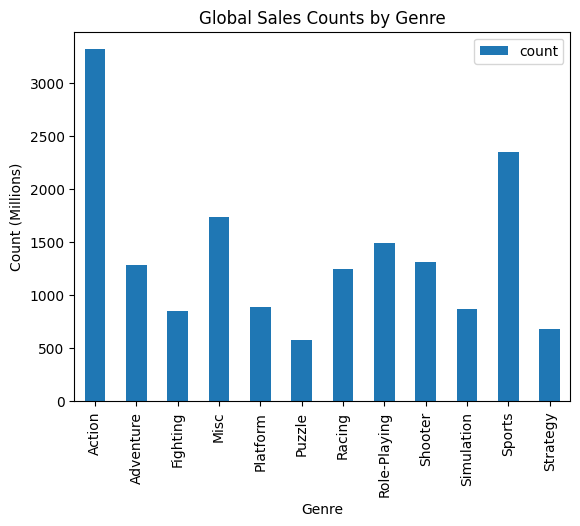

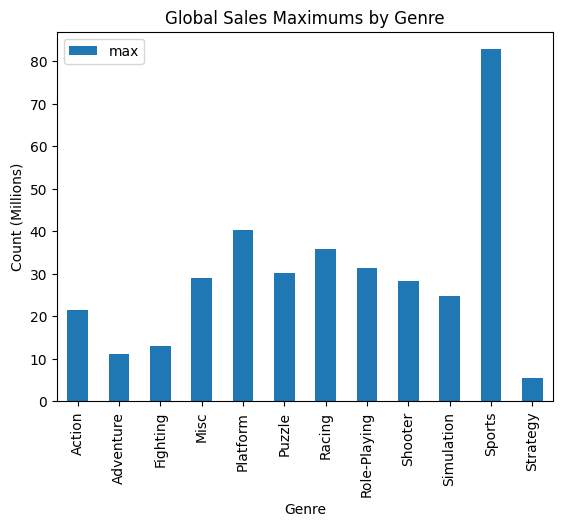

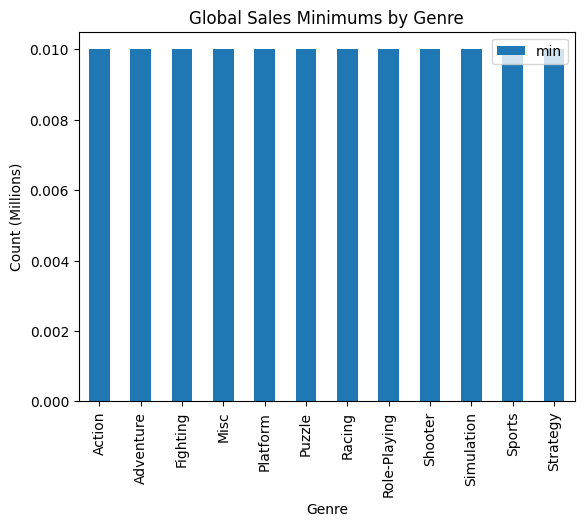

In [19]:
df['Genre'].value_counts().plot(kind='bar')
plt.title("Number of Games per Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Games")
plt.show()


eda1=df.groupby('Genre')['Global_Sales'].agg(['mean'])
eda1.plot(kind='bar')
plt.title("Global Sales Means by Genre")
plt.xlabel("Genre")
plt.ylabel("Count (Millions)")
plt.show()

eda2=df.groupby('Genre')['Global_Sales'].agg(['count'])
eda2.plot(kind='bar')
plt.title("Global Sales Counts by Genre")
plt.xlabel("Genre")
plt.ylabel("Count (Millions)")
plt.show()

eda3=df.groupby('Genre')['Global_Sales'].agg(['max'])
eda3.plot(kind='bar')
plt.title("Global Sales Maximums by Genre")
plt.xlabel("Genre")
plt.ylabel("Count (Millions)")
plt.show()

eda4=df.groupby('Genre')['Global_Sales'].agg(['min'])
eda4.plot(kind='bar')
plt.title("Global Sales Minimums by Genre")
plt.xlabel("Genre")
plt.ylabel("Count (Millions)")
plt.show()

Data Cleaning

In [20]:
df['Real_Name']=df['Name']+' '+df['Platform']
dupes=(df.duplicated(subset='Real_Name',keep=False)).sum()
print(dupes)

df=df.drop_duplicates(subset=['Real_Name'])
dupes=(df.duplicated(subset='Real_Name',keep=False)).sum()
print(dupes)

df=df.dropna()
df.head()

10
0


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Real_Name
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Wii Sports Wii
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Super Mario Bros. NES
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Mario Kart Wii Wii
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Wii Sports Resort Wii
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Pokemon Red/Pokemon Blue GB


Determining Ideal K For The Model

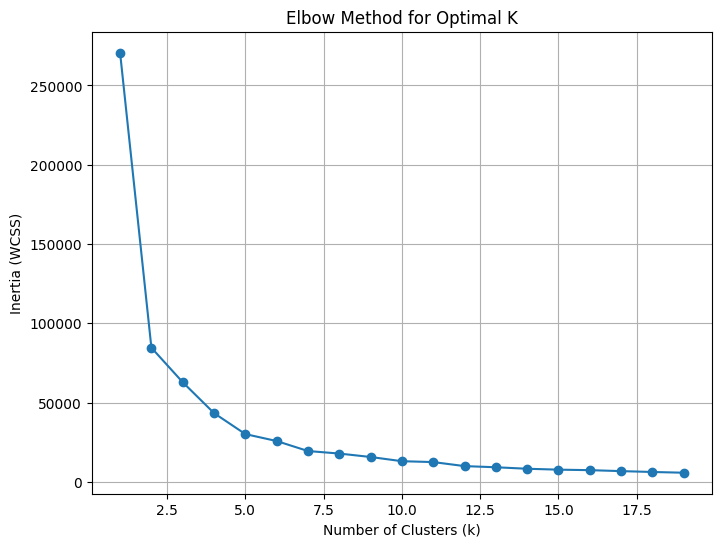

In [21]:
label_encoder=LabelEncoder()
x=pd.DataFrame({'Genre':label_encoder.fit_transform(df['Genre']),'Global_Sales': df['Global_Sales']})

inertias=[]
krange=range(1,20)

for i in krange:
    kmeans=KMeans(n_clusters=i,random_state=4)
    kmeans.fit(x)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(krange,inertias,marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.grid(True)
plt.show()

Building and Training Model (Kmeans)

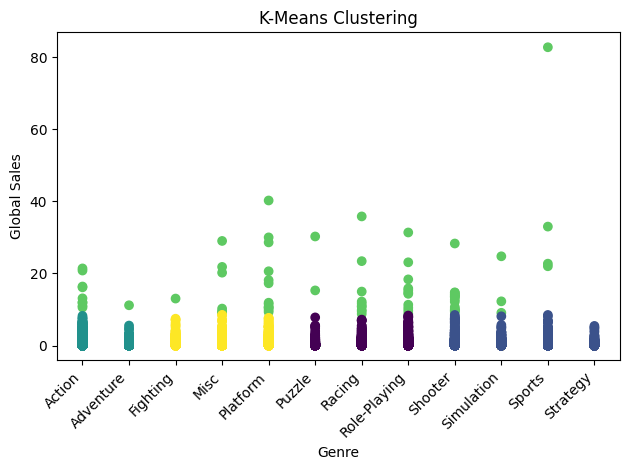

In [22]:
kmeans=KMeans(n_clusters=5,random_state=4)
kmeans.fit(x)
df['cluster']=kmeans.predict(x)
genre_mapping=dict(zip(label_encoder.transform(label_encoder.classes_),label_encoder.classes_))

plt.scatter(x['Genre'],x['Global_Sales'],c=df['cluster'],cmap='viridis')
plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.title('K-Means Clustering')
genre_codes=sorted(genre_mapping.keys())
genre_labels=[genre_mapping[code] for code in genre_codes]
plt.xticks(genre_codes,genre_labels,rotation=45,ha='right')
plt.tight_layout()
plt.show()

Printing Results of Model

In [23]:
for i in range(5):
    cluster_games=df[df['cluster'] == i]
    print(f"\nCluster {i}:")
    print(f"Average Global Sales:{cluster_games['Global_Sales'].mean():.2f}")
    print(f"Most common genres:{cluster_games['Genre'].value_counts().head(3)}")
    print(f"Number of games:{len(cluster_games)}")


Cluster 0:
Average Global Sales:0.47
Most common genres:Genre
Role-Playing    1459
Racing          1213
Puzzle           568
Name: count, dtype: int64
Number of games:3240

Cluster 1:
Average Global Sales:0.49
Most common genres:Genre
Sports        2299
Shooter       1266
Simulation     845
Name: count, dtype: int64
Number of games:5080

Cluster 2:
Average Global Sales:0.40
Most common genres:Genre
Action       3242
Adventure    1273
Name: count, dtype: int64
Number of games:4515

Cluster 3:
Average Global Sales:16.63
Most common genres:Genre
Shooter         16
Platform        13
Role-Playing    11
Name: count, dtype: int64
Number of games:77

Cluster 4:
Average Global Sales:0.51
Most common genres:Genre
Misc        1679
Platform     862
Fighting     835
Name: count, dtype: int64
Number of games:3376


Accuracy for Train and Test Data

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(x,df['Genre'],test_size=0.3,random_state=4,stratify=df['Genre'])

kmeans=KMeans(n_clusters=5,random_state=4)
kmeans.fit(xtrain)

ypred_train=kmeans.predict(xtrain)
ypred_test=kmeans.predict(xtest)

def label_permute_compare(ytdf,yp,n=5):
    perms=list(itertools.permutations(range(n)))
    ytrue=label_encoder.fit_transform(ytdf.values.ravel())
    yp=np.array(yp)
    bestperm=None
    bestacc=0
    for perm in perms:
        ypperm=[perm[label] for label in yp]
        acc=accuracy_score(ytrue,ypperm)
        if acc>bestacc:
            bestacc=acc
            bestperm=perm
    return bestperm,bestacc

train_perm,train_acc=label_permute_compare(ytrain,ypred_train,n=5)
print("Accuracy for train data: ",train_acc)

def apply_permutation(ypred, perm):
    return [perm[label] for label in ypred]

ypred_test_permuted=apply_permutation(ypred_test,train_perm)
label_encoder_test=LabelEncoder()
ytrue_test=label_encoder_test.fit_transform(ytest.values.ravel())
acc_test=accuracy_score(ytrue_test,ypred_test_permuted)
print("Accuracy for test data: ", acc_test)


Accuracy for train data:  0.30321901587580036
Accuracy for test data:  0.30182115817474936


Plot of Confusion Matrix and Model Coefficients

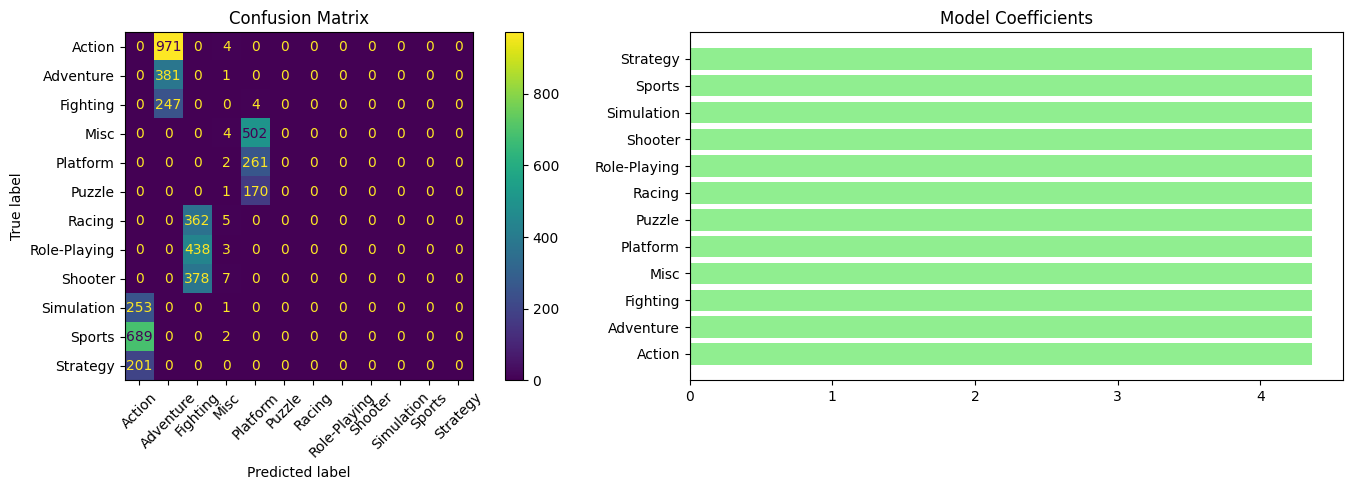

In [ ]:
fig,axes =plt.subplots(1,2,figsize=(15,5))

ConfusionMatrixDisplay.from_predictions(ytrue_test,ypred_test,ax=axes[0], display_labels=label_encoder.classes_)
axes[0].set_title('Confusion Matrix')
axes[0].tick_params(axis='x',rotation=45)

centers=kmeans.cluster_centers_
cluster_labels=[f'Cluster {i}' for i in range(len(centers))]
centermean=centers.mean()
axes[1].barh(label_encoder.classes_,centermean,color='lightgreen')
axes[1].set_title('Model Coefficients')
axes[1].axvline(x=0,color='black',linestyle='--',alpha=0.5)

plt.tight_layout()
plt.show()